In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df = df.drop(["User ID"], axis=1)
df = df.drop(["Gender"], axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1),
                                                    df["Purchased"], 
                                                    test_size = 0.3,
                                                    random_state = 0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

StandardScaler

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler data to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [6]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [7]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [8]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

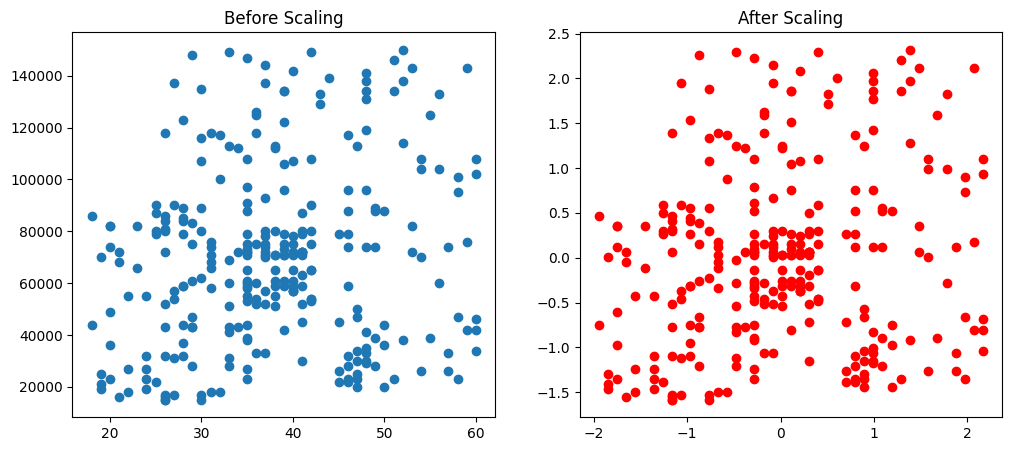

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Scaling")
plt.show()

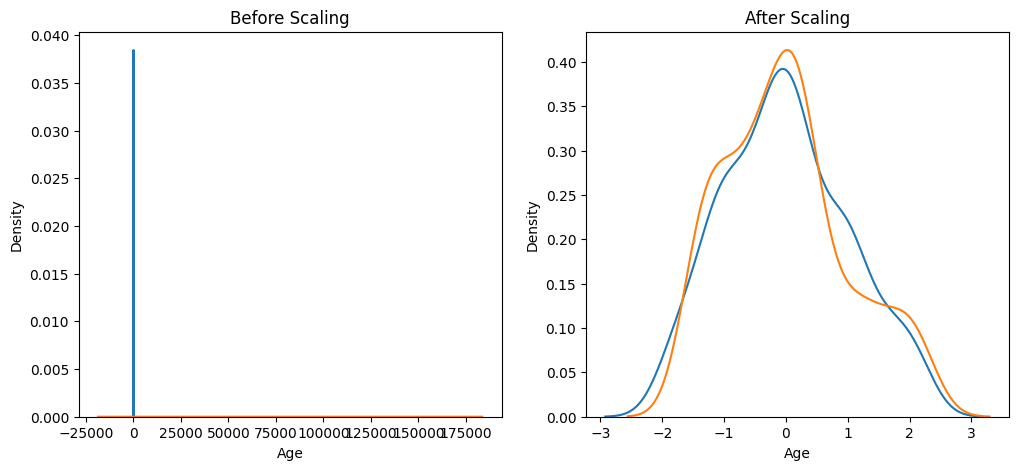

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax = ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax = ax2)
plt.show()

Comparison of #df is your dataframe
df.ColumnName.value_counts(ascending = True)

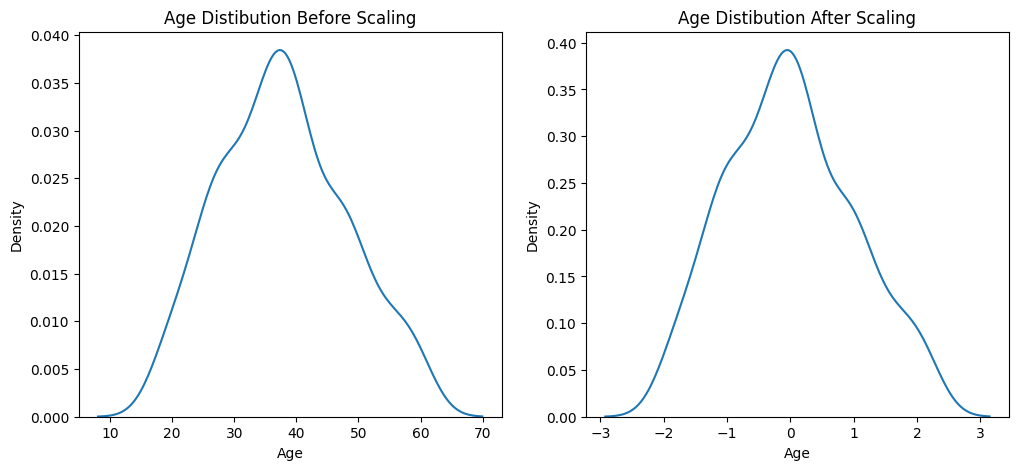

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Age Distibution Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)

ax2.set_title("Age Distibution After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax = ax2)
plt.show()

Why scaling is important ?

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [14]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [18]:
from sklearn.tree import DecisionTreeClassifier


In [19]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [20]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)


In [22]:
print ("Actual", accuracy_score(y_test, y_pred))
print ("Scaled", accuracy_score(y_test, y_pred_scaled))


Actual 0.8666666666666667
Scaled 0.8666666666666667


In [23]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [24]:
df = pd.concat([df, pd.DataFrame({"Age": [5, 90, 95], "EstimatedSalary": [1000, 250000, 350000], "Purchased": [0, 1, 1]})], ignore_index=True)


In [25]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


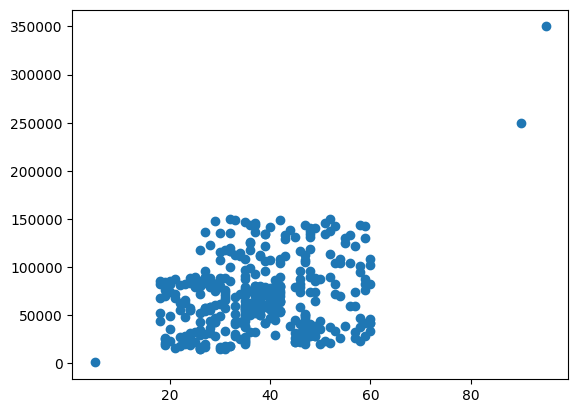

In [26]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1),
                                                    df["Purchased"], 
                                                    test_size = 0.3,
                                                    random_state = 0)

x_train.shape, x_test.shape

((282, 2), (121, 2))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


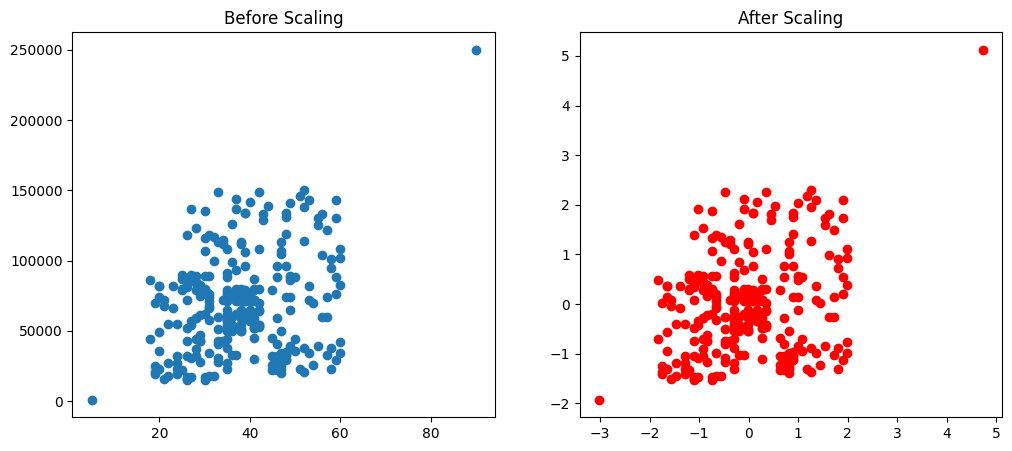

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Scaling")
plt.show()

Normalization

# Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required when you are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an important equally important attribute. 
 

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   

In [32]:
df = pd.read_csv("wine_data.csv", header=None , usecols=[0,1,2])
df.columns = ["Class label", "Alcohol", "Malic Acid"]

In [33]:
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

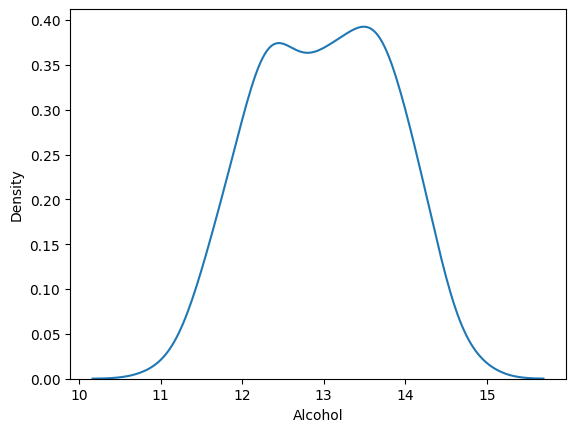

In [34]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic Acid', ylabel='Density'>

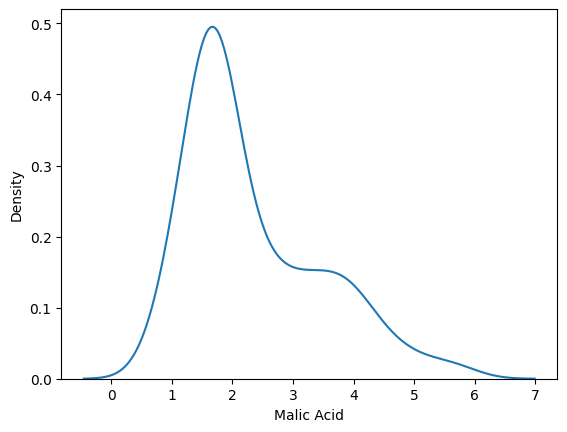

In [35]:
sns.kdeplot(df["Malic Acid"])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

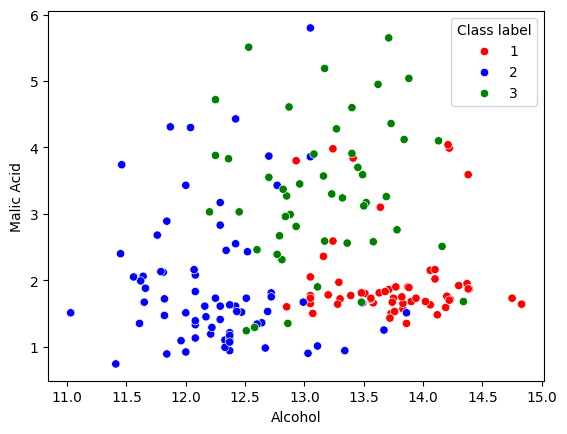

In [36]:
color_dict = {1:"red", 2:"blue", 3:"green"}
sns.scatterplot(x = "Alcohol", y = "Malic Acid", hue = "Class label", data = df, palette = color_dict)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Class label", axis = 1),
                                  df["Class label"],
                                  test_size = 0.3,
                                  random_state = 0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [39]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [40]:
np.round(x_train.describe(), 2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [41]:
np.round(x_train_scaled.describe(), 2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


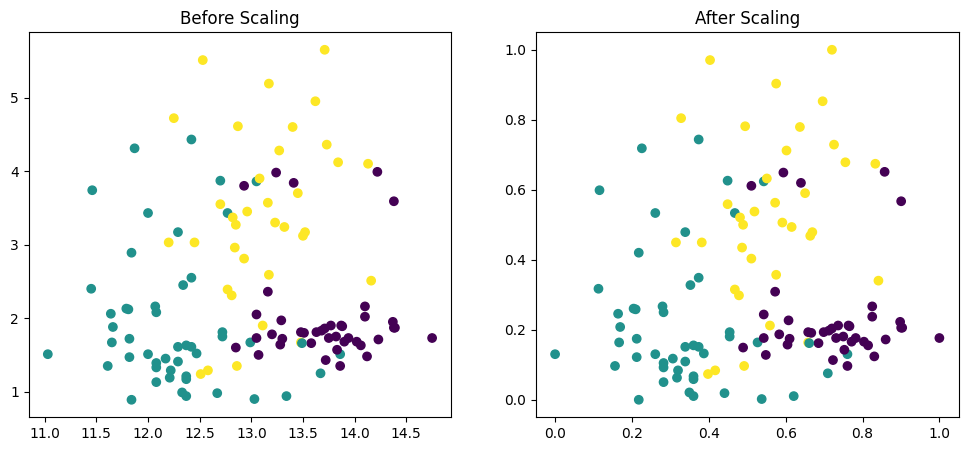

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(x_train["Alcohol"], x_train["Malic Acid"], c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"], x_train_scaled["Malic Acid"], c = y_train)
ax2.set_title("After Scaling")
plt.show()


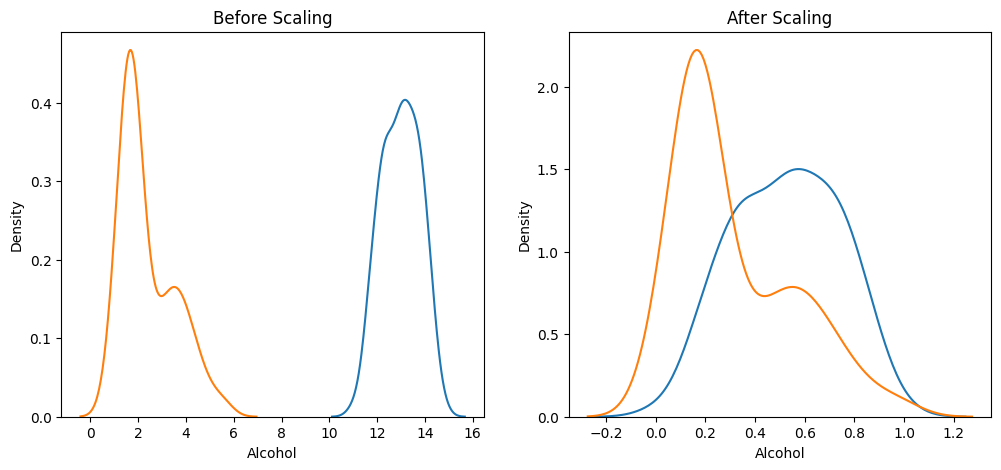

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Alcohol"], ax = ax1)
sns.kdeplot(x_train["Malic Acid"], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Alcohol"], ax = ax2)
sns.kdeplot(x_train_scaled["Malic Acid"], ax = ax2)
plt.show()

ordinal encoding

In [44]:
import numpy as pd
import pandas as pd

In [45]:
df = pd.read_csv("customer.csv")

In [46]:
df.sample(5)

,age,gender,review,education,purchased
41,23,Male,Good,PG,Yes
36,34,Female,Good,UG,Yes
27,69,Female,Poor,PG,No
49,25,Female,Good,UG,No
20,57,Female,Average,School,Yes


In [47]:
df =  df.iloc[:, 2:]

In [48]:
df

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No
5,Average,School,Yes
6,Good,School,No
7,Poor,School,Yes
8,Average,UG,No
9,Good,UG,Yes


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1], test_size = 0.2,)
x_train

,review,education
2,Good,PG
42,Good,PG
32,Average,UG
28,Poor,School
48,Good,UG
15,Poor,UG
38,Good,School
49,Good,UG
37,Average,PG
1,Poor,UG


In [50]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])

In [51]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [52]:
x_train = oe.transform(x_train)
x_test = oe.transform(x_test)

In [53]:
x_train

array([[2., 2.],
       [2., 2.],
       [1., 1.],
       [0., 0.],
       [2., 1.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [1., 2.],
       [0., 1.],
       [1., 2.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [2., 2.],
       [0., 1.],
       [1., 1.],
       [0., 2.],
       [2., 0.],
       [2., 2.],
       [1., 1.],
       [0., 1.],
       [0., 2.],
       [1., 0.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [2., 0.],
       [1., 0.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [2., 1.],
       [1., 0.],
       [2., 2.],
       [0., 0.],
       [0., 2.]])

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder() 

In [56]:
le.fit(y_train)

LabelEncoder()

In [57]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [58]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [59]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

one Hot Encoding

In [60]:
import numpy as np
import pandas as pd

In [61]:
df = pd.read_csv("cars.csv")

In [62]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [63]:
df["brand"].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [64]:
df["brand"].nunique() # Number of the count of the brands

32

In [65]:
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [66]:
df.owner.value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

OneHotEncoder using pandas

In [67]:
pd.get_dummies(df, columns=["brand", "fuel", "owner"], drop_first=True) 

,km_driven,selling_price,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,450000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,120000,370000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,140000,158000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,127000,225000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,120000,130000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,320000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8124,119000,135000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
8125,120000,382000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8126,25000,290000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


OneHotEncoding using Sklearn

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:4], df.iloc[:, -1], test_size = 0.2, random_state = 0)

In [69]:
x_train.head()

,brand,km_driven,fuel,owner
3042,Hyundai,60000,LPG,First Owner
1520,Tata,150000,Diesel,Third Owner
2611,Hyundai,110000,Diesel,Second Owner
3544,Mahindra,28000,Diesel,Second Owner
4138,Maruti,15000,Petrol,First Owner


In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe = OneHotEncoder(drop="first", sparse_output=False)

In [72]:
x_train_new = ohe.fit_transform(x_train[["fuel", "owner"]])

In [73]:
x_test_new = ohe.transform(x_test[["fuel", "owner"]])

In [74]:
np.hstack((x_train[["brand", "km_driven"]].values, x_train_new)).shape

(6502, 9)

In [75]:
counts = df["brand"].value_counts()

In [76]:
counts

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [77]:
df["brand"].nunique()
threshold = 100

In [78]:
repl  = counts[counts <= threshold].index

In [79]:
pd.get_dummies(df["brand"].replace(repl, "uncommon"),)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False


Pipeline

In [80]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 

In [81]:
df = pd.read_csv("train.csv")

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [85]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1),
                                                    df["Survived"], 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [86]:
# Applying imputation

si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy="most_frequent")

x_train_age = si_age.fit_transform(x_train[["Age"]])
x_train_embarked = si_embarked.fit_transform(x_train[["Embarked"]])

x_test_age = si_age.transform(x_test[["Age"]])
x_test_embarked = si_embarked.transform(x_test[["Embarked"]])

In [87]:
# One hot Encoding sex and embarked
one_sex = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one_embarked = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

x_train_sex = one_sex.fit_transform(x_train[["Sex"]])
x_train_embarked = one_embarked.fit_transform(x_train[["Embarked"]])

x_test_sex = one_sex.transform(x_test[["Sex"]])
x_test_embarked = one_embarked.transform(x_test[["Embarked"]])

In [88]:
x_train_rem = x_train.drop(columns=["Sex", "Age", "Embarked"])

In [89]:
x_test_rem = x_test.drop(columns = ["Sex", "Age", "Embarked"])

In [90]:
x_train_transformed = np.concatenate((x_train_rem,x_train_age, x_train_sex, x_train_embarked), axis=1)
x_test_transformed = np.concatenate((x_test_rem, x_test_age, x_test_sex, x_test_embarked), axis=1)

In [91]:
clf = DecisionTreeClassifier()
clf.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [92]:
y_pred = clf.predict(x_test_transformed)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7877094972067039

In [94]:
import numpy as np
import pandas as pd

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [96]:

df = pd.read_csv("train.csv")

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [99]:
# Step 1 : Train test split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["Survived"]),
                                                    df["Survived"],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [100]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [101]:
# imputation transformer
trf1 = ColumnTransformer([
    ("impute_age", SimpleImputer(), [2]),
    ("impute_embarked", SimpleImputer(strategy="most_frequent"), [6])
], remainder="passthrough")

In [102]:
# One hot encoding
trf2 = ColumnTransformer([
    ("ohe_sex_embarked", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), [1, 6])
], remainder="passthrough")


In [103]:
# Scaling
trf3 = ColumnTransformer([
    ("scale", MinMaxScaler(), slice(0, 10))
])

In [104]:
# Feature selection
trf4 = SelectKBest(score_func=chi2, k=5)

In [105]:
# train the model
trf5 = DecisionTreeClassifier()

Create Pipeline

In [106]:
pipe = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2),
    ("trf3", trf3),
    ("trf4", trf4),
    ("trf5", trf5)
])

Pipeline vs make_pipeline
Pipeline required nameng of step, make_pipeline dose not required naming of step

In [107]:
#Alernate syntax
pipe = make_pipeline(trf1, trf2, trf3, trf4, trf5)

In [108]:
#train 
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x0000026A7A86DA80>)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [109]:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'columntransformer-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'columntransformer-3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'selectkbest': SelectKBest(k=5, score_func=<function chi2 at 0x0000026A7A86DA80>),
 'decisiontreeclassifier': DecisionTreeClassifier()}

In [110]:
# Predict
y_pred = pipe.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6256983240223464

Cross Validation using pipeline

In [112]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x_train, y_train, cv=5, scoring="accuracy").mean()

0.6391214419383433

GridSearch using Pipeline

In [113]:
# gridsearchcv
params = {
    "trf5__max_depth": [1, 2, 3, 4, 5, None]
}

In [114]:

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

ValueError: Invalid parameter 'trf5' for estimator Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x0000026A7A86DA80>)),
                ('decisiontreeclassifier', DecisionTreeClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
import pickle
pickle.dump(pipe, open("pipe.pkl", "wb"))

Function Transform

Log Transform

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats # for statistical analysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df= pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])

In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_5164\1809399462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\admin\AppData\Local\Temp\ipykernel_5164\546264468.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age"])


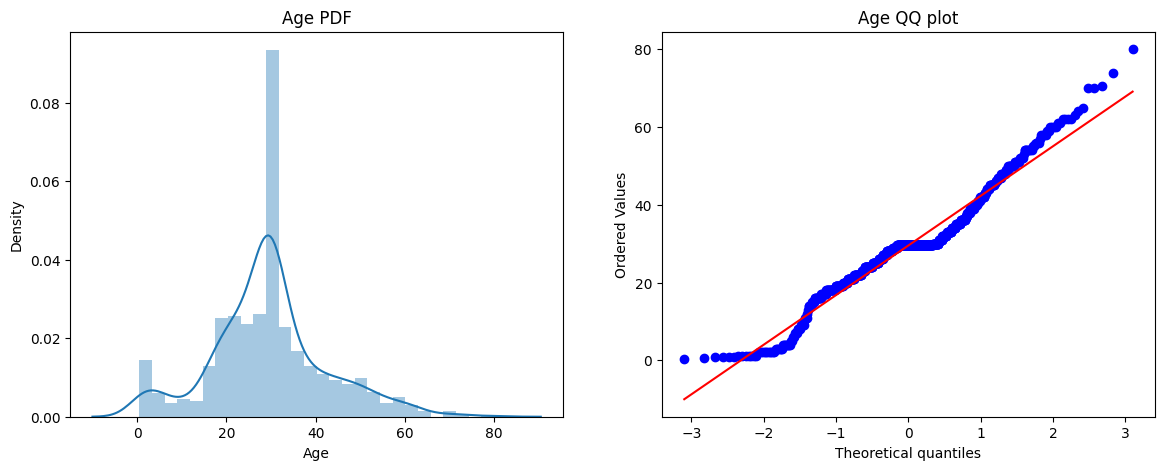

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(x_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ plot")

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5164\3242040846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Fare"])


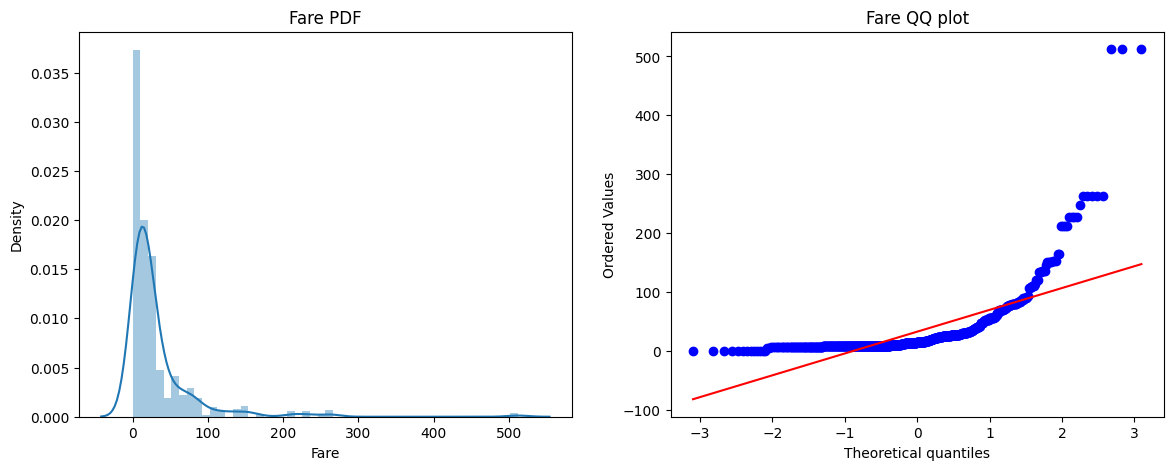

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.distplot(x_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(x_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Logistic Regression", accuracy_score(y_test, y_pred))
print("Decision Tree", accuracy_score(y_test, y_pred2))



Logistic Regression 0.6480446927374302
Decision Tree 0.6815642458100558


In [ ]:
trf = FunctionTransformer(func = np.log1p)

In [ ]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print("Logistic Regression", accuracy_score(y_test, y_pred))
print("Decision Tree", accuracy_score(y_test, y_pred2))

Logistic Regression 0.6815642458100558
Decision Tree 0.6703910614525139


In [ ]:
x_transformed = trf.transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Logistic Regression", cross_val_score(clf, x_transformed, y, cv=5, scoring="accuracy").mean())
print("Decision Tree", cross_val_score(clf2, x_transformed, y, cv=5, scoring="accuracy").mean())

Logistic Regression 0.6780114242671521
Decision Tree 0.6408511706735297


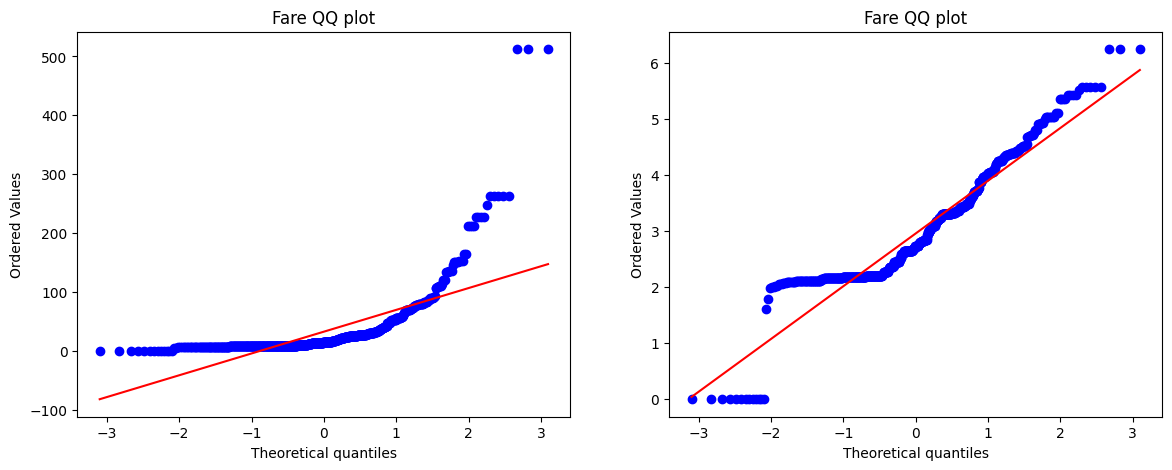

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
stats.probplot(x_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.subplot(122)
stats.probplot(x_train_transformed["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.show()

In [ ]:
trf2 = ColumnTransformer([
    ("log_transform", FunctionTransformer(np.log1p), ["Fare"])
], remainder="passthrough")

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("Logistic Regression", accuracy_score(y_test, y_pred))
print("Decision Tree", accuracy_score(y_test, y_pred2))

Logistic Regression 0.6703910614525139
Decision Tree 0.6815642458100558


In [ ]:
x_transformed2 = trf2.transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Logistic Regression", cross_val_score(clf, x_transformed2, y, cv=5, scoring="accuracy").mean())
print("Decision Tree", cross_val_score(clf2, x_transformed2, y, cv=5, scoring="accuracy").mean())

Logistic Regression 0.6712635741635804
Decision Tree 0.6520934027995733


In [ ]:
def apply_transform(transform):
    # Select features (including "Fare") and target variable
    x = df.iloc[:, 1:3]  # Make sure "Fare" is in this range
    y = df.iloc[:, 0]

    # Apply the transformation on the "Fare" column
    trf = ColumnTransformer([("log", FunctionTransformer(transform), ["Fare"])], remainder="passthrough")

    # Transform the data
    x_trans = trf.fit_transform(x)
    
    # Create the Logistic Regression model
    clf = LogisticRegression()

    # Perform 10-fold cross-validation with transformed data
    print("Accuracy:", np.mean(cross_val_score(clf, x_trans, y, cv=10, scoring="accuracy")))

    # Plot the QQ plot for transformed "Fare" column
    plt.figure(figsize=(14, 5))
    
    # QQ Plot before transformation
    plt.subplot(121)
    stats.probplot(df["Fare"], dist="norm", plot=plt)
    plt.title("Fare QQ plot (Original)")

    # QQ Plot after transformation (assume transformed "Fare" is the first column in x_trans)
    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist="norm", plot=plt)
    plt.title("Fare QQ plot (Transformed)")

    plt.show()

Accuracy: 0.61729088639201


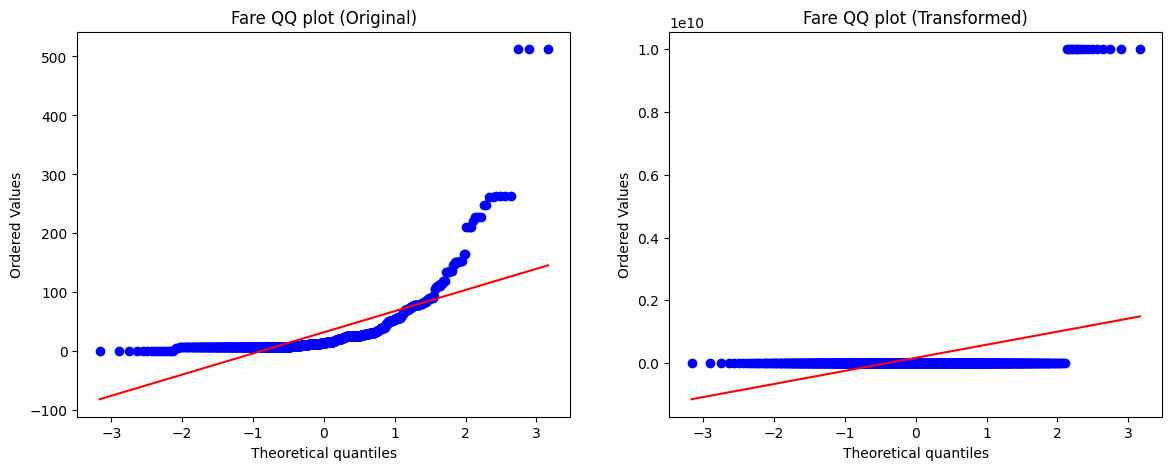

In [ ]:

apply_transform(lambda x: 1/(x + 0.0000000001))

Power Transformer


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import FunctionTransformer

In [ ]:
df = pd.read_csv("concrete_data.csv")

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
x = df.drop(columns=["Strength"])
y = df.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.unique())  # Check the unique values in the target variable


[27.68 62.05 23.8  33.4   7.4  27.77 18.29 48.59 39.7   4.57 13.29 36.97
 22.53 71.3  25.61 76.24 62.94 17.54 41.05 21.86 47.13 16.5  22.72 29.72
 19.93  9.62 39.05 42.13 39.32 34.49 28.1  38.6  53.77  7.32 32.82 43.38
 55.16 35.23 66.7  30.88 76.8  17.96 55.06 64.3  33.8  45.94 37.26 24.85
 40.15 13.54 32.88 17.57 21.54 17.84 23.4  55.55 17.6  31.42 13.82 65.91
 81.75 28.8  42.8  13.33 12.47 27.42 32.04 39.4  28.3  15.36 41.1  23.84
 43.25 34.57 10.22 39.09 24.66 22.95 47.03 18.13 45.7  31.12 20.73 36.56
 12.46 32.66 38.5  25.18 17.95 19.2  26.2  15.52 11.41 60.29 69.84 24.92
 36.3  32.33 39.29 66.82 25.72 25.2  23.64 33.76 13.36 51.06 24.48 25.57
 44.03 32.85 13.46 38.11 74.99 79.3  15.53 46.39 12.18  9.85 33.7  23.25
 36.45 77.3  25.56 38.46 23.52 37.81 19.69 37.43 26.05 38.89 26.15 11.48
 33.06 15.69 67.31 28.63 32.07 39.45 39.23 39.38 27.34 31.54 41.3  58.8
 45.08 51.72 55.51 23.85 68.75 53.1  15.03 67.7  17.58 39.94 24.5  11.96
 67.11 79.99 23.35 33.94 13.09 57.23 19.99 23.74 44.

In [ ]:
# Example: Convert continuous target into binary categories
y_train = pd.cut(y_train, bins=2, labels=[0, 1])
y_test = pd.cut(y_test, bins=2, labels=[0, 1])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

# Fit the model
lr.fit(x_train, y_train)

# Predict on the test data
y_pred = lr.predict(x_test)

# Evaluate the model
print("R^2 Score:", r2_score(y_test, y_pred))


R^2 Score: 0.3982385760247683


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(714, 3)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv = 10, scoring="accuracy"))

0.6274647887323943

In [ ]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = "ordinal", strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = "ordinal", strategy="quantile")

In [ ]:
trf = ColumnTransformer([
    ("first", kbin_age, [0]),
    ("second", kbin_fare, [1])
])

In [ ]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [ ]:
trf.named_transformers_["first"].n_bins_

array([15])

In [ ]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    "age" : x_train["Age"],
    "age_trf" : x_train_trf[:, 0],
    "fare" : x_train["Fare"],
    "fare_trf" : x_train_trf[:, 1]
})

In [ ]:
output["age_labels"] = pd.cut(x = x_train["Age"], bins = trf.named_transformers_["first"].bin_edges_[0].tolist())
output["fare_labels"] = pd.cut(x = x_train["Fare"], bins = trf.named_transformers_["second"].bin_edges_[0].tolist())

In [ ]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
125,12.0,1.0,11.2417,5.0,"(6.0, 16.0]","(10.5, 13.0]"
721,17.0,2.0,7.0542,0.0,"(16.0, 19.0]","(0.0, 7.25]"
730,29.0,7.0,211.3375,14.0,"(28.0, 30.0]","(108.9, 512.329]"
193,3.0,0.0,26.0000,9.0,"(0.42, 6.0]","(18.75, 26.0]"
333,16.0,2.0,18.0000,7.0,"(6.0, 16.0]","(14.454, 18.75]"


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred = clf.predict(x_test_trf)

In [ ]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [ ]:
x_trf = trf.transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv = 10, scoring="accuracy"))

0.665414710485133

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [ ]:
df["number"].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Number of passengers travelling with')

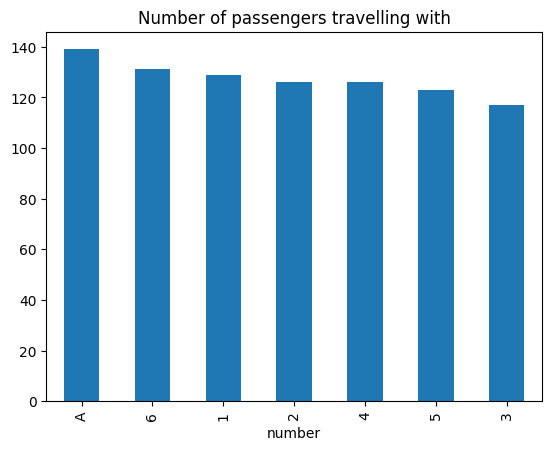

In [ ]:
fig = df["number"].value_counts().plot(kind="bar")
fig.set_title("Number of passengers travelling with")

In [ ]:
# Extract numeric part
df["number_numerical"] = pd.to_numeric(df["number"], errors="coerce", downcast="integer")

In [ ]:
#extract categorical part
df["number_categorical"] = df["number"].str.extract("([A-Za-z]+)", expand=False)

In [ ]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [ ]:
df["cabin_num"] = df["Cabin"].str.extract("([0-9]+)", expand=False)
df["cabin_cat"] = df["Cabin"].str[0]

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("titanic_toy.csv")

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [ ]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [ ]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [ ]:
mean_age = x_train["Age"].mean()
median_age = x_train["Age"].median()

mean_fare = x_train["Fare"].mean()
mwdian_fare = x_train["Fare"].median()

In [ ]:
x_train["Age_median"] = x_train["Age"].fillna(median_age)
x_train["Age_mean"] = x_train["Age"].fillna(mean_age)

x_train["Fare_median"] = x_train["Fare"].fillna(mwdian_fare)
x_train["Fare_mean"] = x_train["Fare"].fillna(mean_fare)

In [ ]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
449,52.0,30.5000,0,52.0,52.0,30.5000,30.5000
71,16.0,46.9000,7,16.0,16.0,46.9000,46.9000
172,1.0,11.1333,2,1.0,1.0,11.1333,11.1333
523,44.0,57.9792,1,44.0,44.0,57.9792,57.9792
574,16.0,8.0500,0,16.0,16.0,8.0500,8.0500


In [ ]:
print("Original Age variable varience : ", x_train["Age"].var())
print("Age variable variance after median imputation : ", x_train["Age_median"].var())
print("Age variable variance after mean imputation : ", x_train["Age_mean"].var())

print("Original Fare variable varience : ", x_train["Fare"].var())
print("Fare variable variance after median imputation : ", x_train["Fare_median"].var())
print("Fare variable variance after mean imputation : ", x_train["Fare_mean"].var())

Original Age variable varience :  210.2517072477435
Age variable variance after median imputation :  169.20731007048155
Age variable variance after mean imputation :  168.85193366872227
Original Fare variable varience :  2761.0314349486343
Fare variable variance after median imputation :  2637.012481677765
Fare variable variance after mean imputation :  2621.232374951235


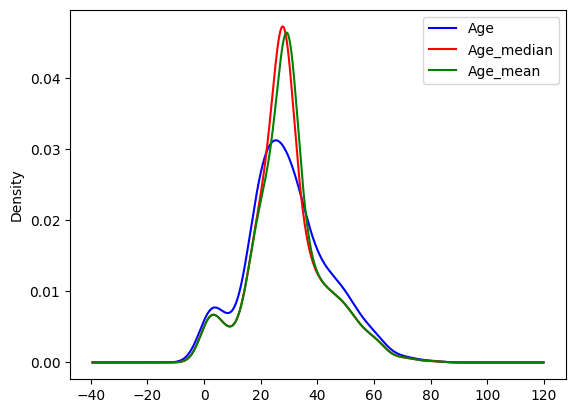

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable destributution 
x_train["Age"].plot(kind = "kde", ax =ax, color = "blue")

#variable imputed with the median
x_train["Age_median"].plot(kind = "kde", ax =ax, color = "red")

#variable imputed with the mean
x_train["Age_mean"].plot(kind = "kde", ax =ax, color = "green")

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = "best")

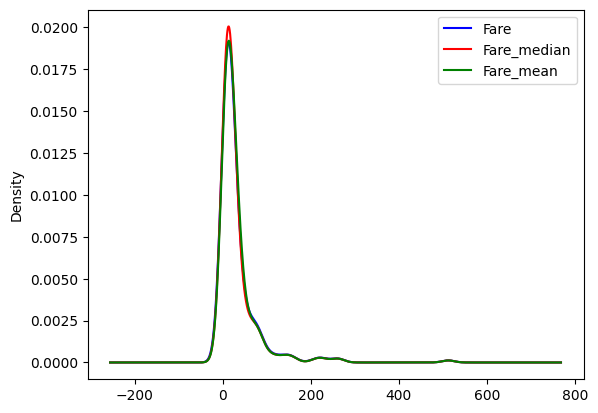

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original variable destributution
x_train["Fare"].plot(kind = "kde", ax =ax, color = "blue")

#variable imputed with the median
x_train["Fare_median"].plot(kind = "kde", ax =ax, color = "red")

#variable imputed with the mean
x_train["Fare_mean"].plot(kind = "kde", ax =ax, color = "green")

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = "best")

In [ ]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


<Axes: >

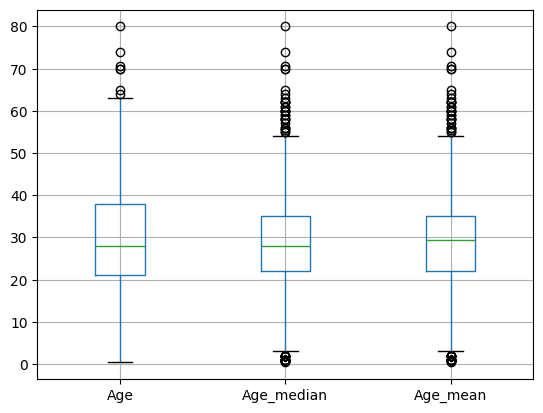

In [ ]:
x_train[["Age", "Age_median", "Age_mean"]].boxplot()

<Axes: >

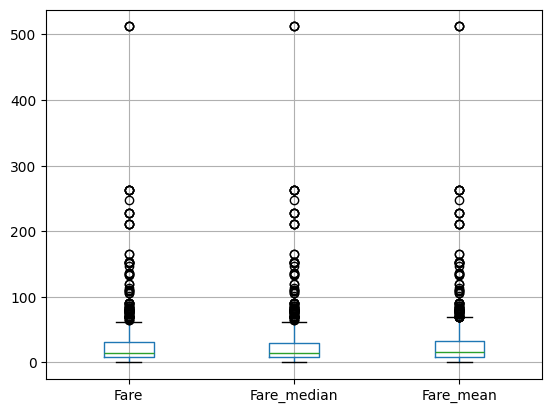

In [ ]:
x_train[["Fare", "Fare_median", "Fare_mean"]].boxplot()

Using Sklearn

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=2)

In [ ]:
impute1 = SimpleImputer(strategy="mean")
impute2 = SimpleImputer(strategy="median")

In [ ]:
trf = ColumnTransformer([
    ("imputer1", impute1, ["Age"]),
    ("imputer2", impute2, ["Fare"])
], remainder="passthrough")

In [ ]:
trf.fit(x_train)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_["imputer1"].statistics_

array([29.78590426])

In [ ]:
trf.named_transformers_["imputer2"].statistics_

array([14.4583])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train(1).csv", usecols = ["GarageQual", "FireplaceQu", "SalePrice"])

In [ ]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

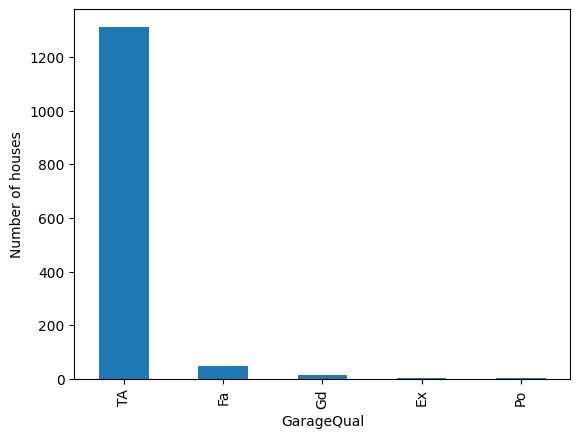

In [ ]:
df["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

In [ ]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

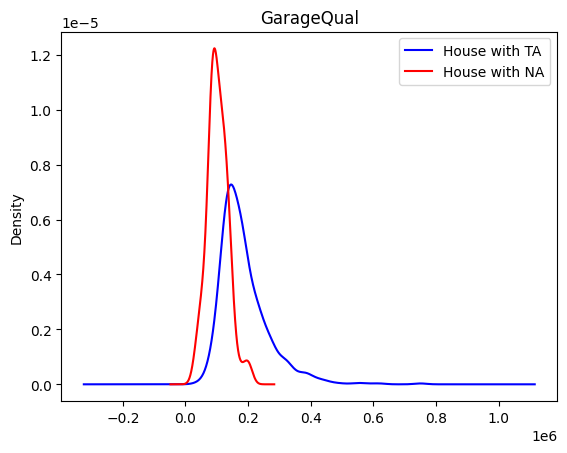

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind="kde", ax=ax, color="blue")

df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde", ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()
labels = ["House with TA", "House with NA"]
ax.legend(lines, labels, loc="best")

plt.title("GarageQual")

In [ ]:
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

In [ ]:
df["GarageQual"].fillna("TA", inplace=True)

<Axes: xlabel='GarageQual'>

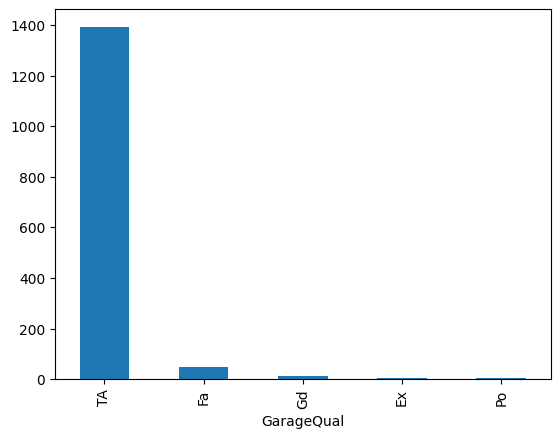

In [ ]:
df["GarageQual"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

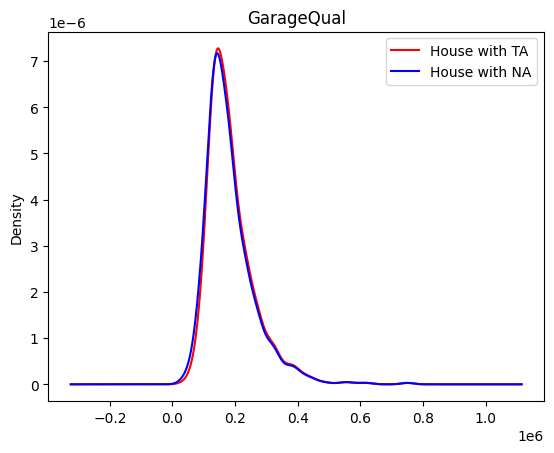

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind="kde", ax=ax, color="red")

df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind="kde", ax=ax, color="blue")


lines, labels = ax.get_legend_handles_labels()
labels = ["House with TA", "House with NA"]
ax.legend(lines, labels, loc="best")

plt.title("GarageQual")

KNN

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("train.csv", usecols=["Age", "Pclass", "Fare", "Survived"])

In [ ]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df.isnull().mean()*100

Survived     0.00000
Pclass       0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
x_train.head()

,Pclass,Age,Fare
30,1,40.0,27.7208
10,3,4.0,16.7000
873,3,47.0,9.0000
182,3,9.0,31.3875
876,3,20.0,9.8458


In [ ]:
knn = KNNImputer(n_neighbors=3, weights= "distance")

x_train_trf = knn.fit_transform(x_train)
x_test_trf = knn.transform(x_test)

lr = LogisticRegression()

lr.fit(x_train_trf, y_train)

y_pred = lr.predict(x_test_trf)

accuracy_score(y_test, y_pred)

0.7150837988826816

In [ ]:
pd.DataFrame(x_train_trf, columns=x_train.columns)

,Pclass,Age,Fare
0,1.0,40.000000,27.7208
1,3.0,4.000000,16.7000
2,3.0,47.000000,9.0000
3,3.0,9.000000,31.3875
4,3.0,20.000000,9.8458
...,...,...,...
707,3.0,30.000000,8.6625
708,3.0,26.151292,8.7125
709,1.0,71.000000,49.5042
710,1.0,32.666667,221.7792


In [ ]:
# Comparision with Simple Imputer --> Mean

si = SimpleImputer(strategy="mean")

x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

lr.fit(x_train_trf2, y_train)

y_pred = lr.predict(x_test_trf2)

accuracy_score(y_test, y_pred)


0.6927374301675978

In [150]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [151]:
df = np.round(pd.read_csv('50_Startups.csv'))[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]/10000
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,7.8389,15.3773,29.9737,11.1313
37,4.4070,5.1283,19.7029,8.9949
2,15.3442,10.1146,40.7935,19.1050
14,11.9943,15.6547,25.6513,13.2603
44,2.2178,15.4806,2.8335,6.5200


In [152]:
df = df.iloc[:, :-1]
df

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.9737
37,4.4070,5.1283,19.7029
2,15.3442,10.1146,40.7935
14,11.9943,15.6547,25.6513
44,2.2178,15.4806,2.8335


In [153]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN
df

C:\Users\admin\AppData\Local\Temp\ipykernel_12024\804566493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1,0] = np.NaN
C:\Users\admin\AppData\Local\Temp\ipykernel_12024\804566493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[3,1] = np.NaN
C:\Users\admin\AppData\Local\Temp\ipykernel_12024\804566493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[-1,-1] = np.NaN


,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.9737
37,NaN,5.1283,19.7029
2,15.3442,10.1146,40.7935
14,11.9943,NaN,25.6513
44,2.2178,15.4806,NaN


In [154]:
#Step 1 : Impute all missing values with mean of raspective columns

df0 = pd.DataFrame()

df0["R&D Spend"] = df["R&D Spend"].fillna(df["R&D Spend"].mean())
df0["Administration"] = df["Administration"].fillna(df["Administration"].mean())
df0["Marketing Spend"] = df["Marketing Spend"].fillna(df["Marketing Spend"].mean()) 

In [155]:
df0

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.97370
37,9.3488,5.1283,19.70290
2,15.3442,10.1146,40.79350
14,11.9943,11.5252,25.65130
44,2.2178,15.4806,29.03035


In [156]:
#Remove the col1 imputed value
df1 =df0.copy()

df1.iloc[1,0] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.97370
37,NaN,5.1283,19.70290
2,15.3442,10.1146,40.79350
14,11.9943,11.5252,25.65130
44,2.2178,15.4806,29.03035


In [157]:
#use first three rows to build a model and use the Last for prediction

x = df1.iloc[[0,2,3,4], 1:3]
x

,Administration,Marketing Spend
21,15.3773,29.97370
2,10.1146,40.79350
14,11.5252,25.65130
44,15.4806,29.03035


In [158]:
y = df1.iloc[[0,2,3,4], 0]
print(y)

21     7.8389
2     15.3442
14    11.9943
44     2.2178
Name: R&D Spend, dtype: float64


In [159]:
lr = LinearRegression()
lr.fit(x, y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.02190039])

In [160]:
df1.iloc[1,0] = lr.predict(df1.iloc[1,1:].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.97370
37,23.0219,5.1283,19.70290
2,15.3442,10.1146,40.79350
14,11.9943,11.5252,25.65130
44,2.2178,15.4806,29.03035


In [162]:
#Remove the col2 imputed value

df1.iloc[3,1] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.3773,29.97370
37,23.0219,5.1283,19.70290
2,15.3442,10.1146,40.79350
14,11.9943,NaN,25.65130
44,2.2178,15.4806,29.03035


In [163]:
#Use Last 3 rows to build a model and use the first for the prediction
x = df1.iloc[[0,1,2,4], [0,2]]
x

,R&D Spend,Marketing Spend
21,7.8389,29.97370
37,23.0219,19.70290
2,15.3442,40.79350
44,2.2178,29.03035


In [164]:
y = df1.iloc[[0,1,2,4], 1]
y

21    15.3773
37     5.1283
2     10.1146
44    15.4806
Name: Administration, dtype: float64

In [165]:
lr = LinearRegression()
lr.fit(x,y)
df1.iloc[3,1] = lr.predict(df1.iloc[3, [0,2]].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [166]:
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.377300,29.97370
37,23.0219,5.128300,19.70290
2,15.3442,10.114600,40.79350
14,11.9943,11.358328,25.65130
44,2.2178,15.480600,29.03035


In [167]:
# remove the col3 imputed values
df1.iloc[4,-1] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.377300,29.9737
37,23.0219,5.128300,19.7029
2,15.3442,10.114600,40.7935
14,11.9943,11.358328,25.6513
44,2.2178,15.480600,NaN


In [168]:
# Use last 3 rows to build a model and use the first for the prediction
x = df1.iloc[[0,1,2,3], :-1]
x

,R&D Spend,Administration
21,7.8389,15.377300
37,23.0219,5.128300
2,15.3442,10.114600
14,11.9943,11.358328


In [169]:
lr = LinearRegression()
lr.fit(x,y)
df1.iloc[4,-1] = lr.predict(df1.iloc[4, :-1].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [170]:
df1

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.377300,29.97370
37,23.0219,5.128300,19.70290
2,15.3442,10.114600,40.79350
14,11.9943,11.358328,25.65130
44,2.2178,15.480600,28.19586


In [171]:
df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.0000,0.000000,0.00000
37,13.6731,0.000000,0.00000
2,0.0000,0.000000,0.00000
14,0.0000,-0.166872,0.00000
44,0.0000,0.000000,-0.83449


In [172]:
df2 = df1.copy()
df2.iloc[1,0] = np.NaN
df2

,R&D Spend,Administration,Marketing Spend
21,7.8389,15.377300,29.97370
37,NaN,5.128300,19.70290
2,15.3442,10.114600,40.79350
14,11.9943,11.358328,25.65130
44,2.2178,15.480600,28.19586


In [173]:
x = df2.iloc[[0,2,3,4], 1:3]
y = df2.iloc[[0,2,3,4], 0]

lr = LinearRegression()
lr.fit(x,y)
df2.iloc[1,0] = lr.predict(df2.iloc[1,1:].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [174]:
df2.iloc[3,1] = np.NaN
x = df2.iloc[[0,1,2,4], [0,2]]
y = df2.iloc[[0,1,2,4], 1]

lr = LinearRegression()
lr.fit(x,y)
df2.iloc[3,1] = lr.predict(df2.iloc[3, [0,2]].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [175]:
df2.iloc[4,-1] = np.NaN

x = df2.iloc[[0,1,2,3], :-1]
y = df2.iloc[[0,1,2,3], -1]

lr = LinearRegression()
lr.fit(x,y)
df2.iloc[4,-1] = lr.predict(df2.iloc[4, :-1].values.reshape(1,2))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [176]:
df2

,R&D Spend,Administration,Marketing Spend
21,7.838900,15.377300,29.973700
37,21.725464,5.128300,19.702900
2,15.344200,10.114600,40.793500
14,11.994300,11.084644,25.651300
44,2.217800,15.480600,10.795394


In [177]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.000000,0.000000,0.000000
37,-1.296437,0.000000,0.000000
2,0.000000,0.000000,0.000000
14,0.000000,-0.273684,0.000000
44,0.000000,0.000000,-17.400467


In [ ]:
# Do this iteratively until the difference between the original and imputed dataframes is less than a certain threshold.